In [3]:
!pip install pandas


In [5]:
!pip install "numpy<2"


In [13]:
import pandas as pd
import numpy as np

In [15]:
import os
os.getcwd()

'C:\\Users\\jishu'

In [23]:
df= pd.read_csv("C:/Users/jishu/OneDrive/Ritu/Customer-Churn-Dataset.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Identifying Categorical and Numerical Data
total_cols= len(df.columns)
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

categorical_percent = (len(categorical_cols) / total_cols)*100
numerical_percent= (len(numerical_cols) / total_cols)*100

print(f"Total Columns: {total_cols}")
print(f"Categorical Columns: {len(categorical_cols)} ({categorical_percent:.2f}%)")
print(f"Numerical Columns: {len(numerical_cols)} ({numerical_percent:.2f}%)")


Total Columns: 21
Categorical Columns: 18 (85.71%)
Numerical Columns: 3 (14.29%)


In [31]:
#data cleaning and pre-processing 
df.columns= df.columns.str.strip()

df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [33]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df.shape

(7043, 21)

In [37]:
duplicates = df[df.duplicated()]
duplicates.value_counts()

Series([], Name: count, dtype: int64)

In [39]:
#Finding precent of churn values that are yes and no.
churn_percent = (df['Churn'].value_counts(normalize=True) * 100).round(2)
churn_percent

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

In [41]:
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [47]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})

print(df['Partner'])
print(df['Dependents'])
print(df['Churn'])
print(df['TechSupport'])

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7043, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64
0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7038    1.0
7039    0.0
7040    0.0
7041    0.0
7042    1.0
Name: TechSupport, Length: 7043, dtype: float64


In [51]:
#This shows the total revenue a customer generates for the company over their entire relationship.

df['CustomerLifetimeValue'] = df['MonthlyCharges'] * df['Tenure']
df['CustomerLifetimeValue']

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: CustomerLifetimeValue, Length: 7043, dtype: float64

In [53]:
df['PaymentStability'] = df['TotalCharges'] / (df['MonthlyCharges'] * df['Tenure'] + 1)
df['PaymentStability']

0       0.967585
1       0.975326
2       0.994940
3       0.966527
4       1.064958
          ...   
7038    0.977556
7039    0.990782
7040    1.060778
7041    1.026792
7042    0.981445
Name: PaymentStability, Length: 7043, dtype: float64

In [55]:
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['EngagementScore'] = df[services].apply(lambda x: sum(x == 'Yes'), axis=1)
df['EngagementScore']

0       1
1       1
2       2
3       1
4       0
       ..
7038    3
7039    3
7040    1
7041    0
7042    3
Name: EngagementScore, Length: 7043, dtype: int64

In [59]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 12, 24, 48, 72], labels=['0–1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs'])
df['TenureGroup']

0        0–1 yr
1       2–4 yrs
2        0–1 yr
3       2–4 yrs
4        0–1 yr
         ...   
7038    1–2 yrs
7039    4–6 yrs
7040     0–1 yr
7041     0–1 yr
7042    4–6 yrs
Name: TenureGroup, Length: 7043, dtype: category
Categories (4, object): ['0–1 yr' < '1–2 yrs' < '2–4 yrs' < '4–6 yrs']

In [61]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['Tenure'] + 1)
df['AvgMonthlySpend']

0        14.925000
1        53.985714
2        36.050000
3        40.016304
4        50.550000
           ...    
7038     79.620000
7039    100.861644
7040     28.870833
7041     61.320000
7042    102.156716
Name: AvgMonthlySpend, Length: 7043, dtype: float64

In [65]:
df['SupportBurden']= df['TechSupport']/ (df['Tenure'] + 1)
df['SupportBurden'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.021739
4    0.000000
Name: SupportBurden, dtype: float64

In [67]:
df['LoyalCustomer'] = (df['Tenure'] > 24).astype(int)
df['LoyalCustomer'].head()

0    0
1    1
2    0
3    1
4    0
Name: LoyalCustomer, dtype: int32

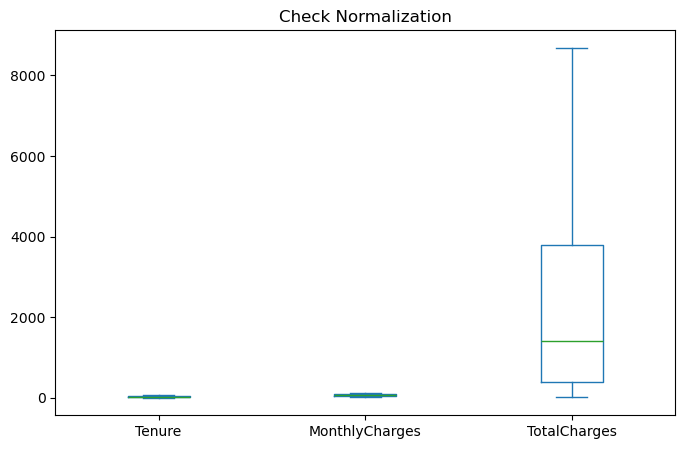

In [71]:
import matplotlib.pyplot as plt

df[['Tenure', 'MonthlyCharges','TotalCharges']].plot(kind='box', figsize=(8,5))
plt.title("Check Normalization")
plt.show()

In [77]:
#This step involves normalizing all the numerical columns to ensure that their values are scaled to a
#consistent range, which helps improve model performance and prevents features with larger numeric values from dominating the learning process.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Columns you want to scale
cols_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform at once
df_scaled = scaler.fit_transform(df[cols_to_scale])

# Add scaled columns back to the dataframe
df[[col + '_scaled' for col in cols_to_scale]] = df_scaled

print(df[['Tenure', 'Tenure_scaled']].head())
print(df[['MonthlyCharges', 'MonthlyCharges_scaled']].head())
print(df[['TotalCharges', 'TotalCharges_scaled']].head())


   Tenure  Tenure_scaled
0       1      -1.277445
1      34       0.066327
2       2      -1.236724
3      45       0.514251
4       2      -1.236724
   MonthlyCharges  MonthlyCharges_scaled
0           29.85              -1.160323
1           56.95              -0.259629
2           53.85              -0.362660
3           42.30              -0.746535
4           70.70               0.197365
   TotalCharges  TotalCharges_scaled
0         29.85            -0.994194
1       1889.50            -0.173740
2        108.15            -0.959649
3       1840.75            -0.195248
4        151.65            -0.940457


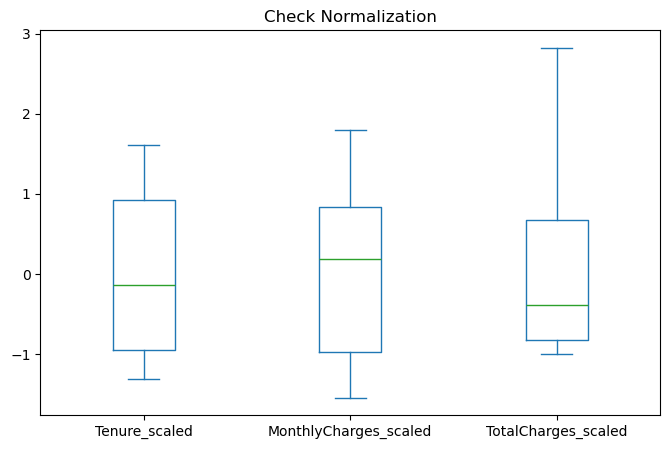

In [83]:
# Here, we use boxplots to check if the numeric columns are properly normalized and to 
# see whether their values are evenly scaled without extreme outliers.

df[['Tenure_scaled', 'MonthlyCharges_scaled', 'TotalCharges_scaled']].plot.box(figsize=(8,5))
plt.title("Check Normalization")
plt.show()
